![Customer Segmentation](https://static.waveon.io/img/blog/_posting/01h57sspmfr07qw4sb60rqzwdq.png)
*Caption: iStock*

<font size="6">**WELCOME!**</font>

Welcome to "***Clustering (Customer Segmentation) Project***".  

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

# Tasks


 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

 2. Exploratory Data Analysis (EDA)


 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

# Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from pyclustertend import hopkins

## Load Dataset

In [3]:
df= pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


##  Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [4]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [5]:
df.drop(columns=["CustomerID"],axis=1,inplace = True)

In [6]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
df.nunique()

Gender             2
Age               51
Annual_Income     64
Spending_Score    84
dtype: int64

In [8]:
df.Gender.replace("Male",0,inplace=True)
df.Gender.replace("Female",1,inplace=True)

In [9]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          200 non-null    int64
 1   Age             200 non-null    int64
 2   Annual_Income   200 non-null    int64
 3   Spending_Score  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [11]:
df.shape

(200, 4)

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

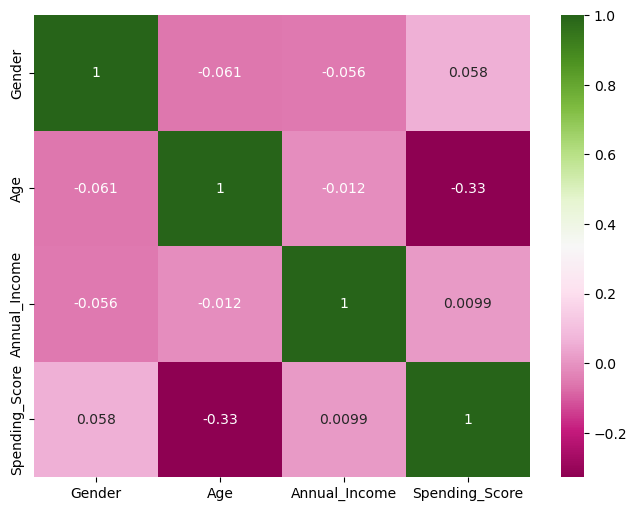

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df.corr(),annot=True,cmap='PiYG')
plt.show()

In [15]:
df.groupby("Gender")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
0,88.0,39.806818,15.514812,18.0,27.75,37.0,50.5,70.0
1,112.0,38.098214,12.644095,18.0,29.00,35.0,47.5,68.0


In [16]:
df.groupby("Gender")["Annual_Income"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
0,88.0,62.227273,26.638373,15.0,45.50,62.5,78.00,137.0
1,112.0,59.250000,26.011952,16.0,39.75,60.0,77.25,126.0


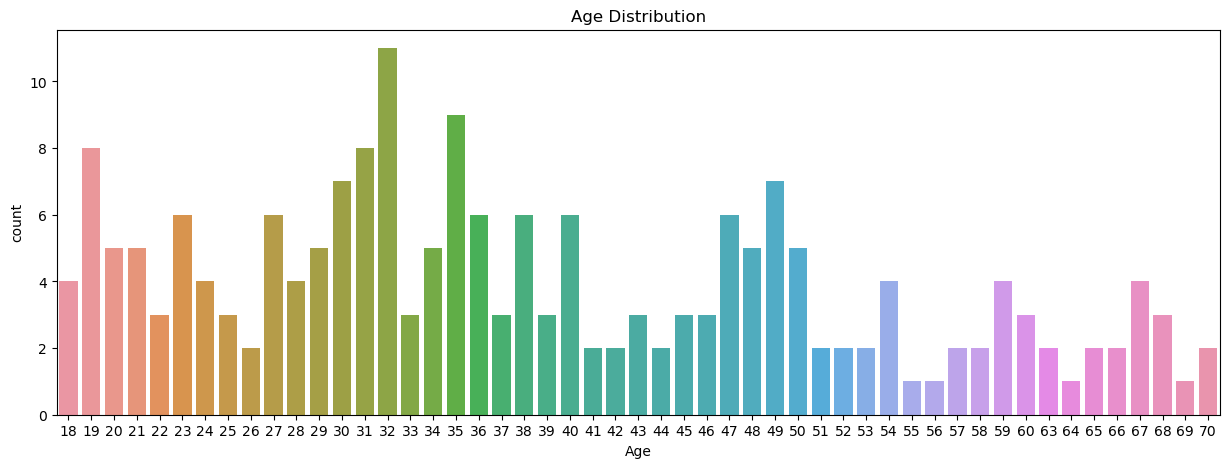

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(df, x="Age")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

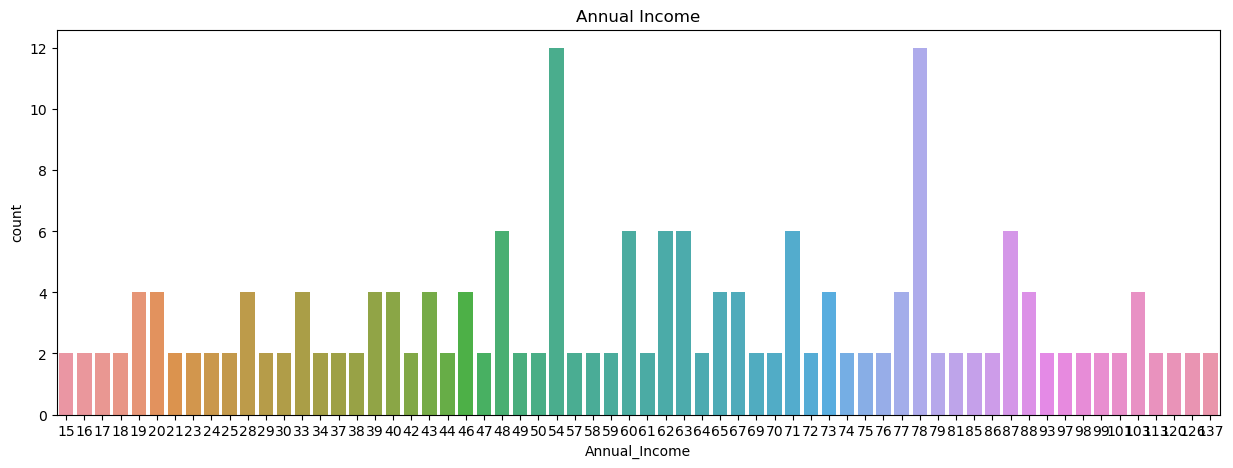

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(df, x="Annual_Income")
plt.title('Annual Income');

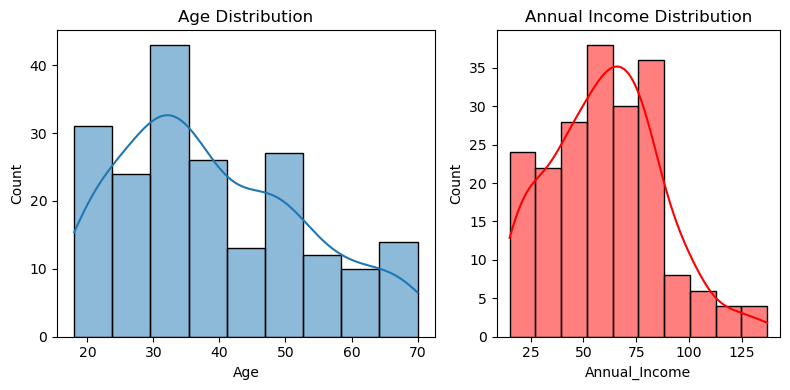

In [19]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(data=df, x="Age", kde=True, ax=axs[0])
axs[0].set_title('Age Distribution')
sns.histplot(data=df, x="Annual_Income", kde=True, color='red', ax=axs[1])
axs[1].set_title('Annual Income Distribution')
f.tight_layout()

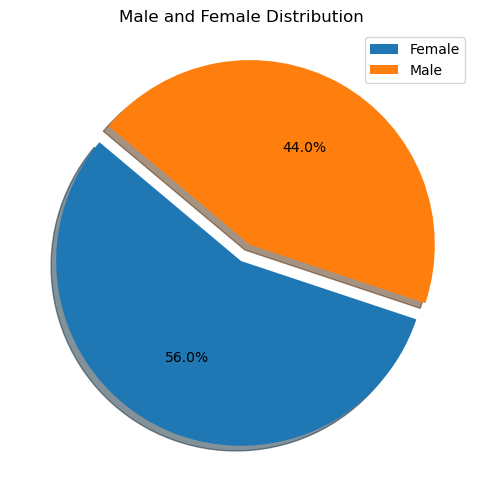

In [20]:
plt.figure(figsize=(6,6))

explode = [0,0.1]
plt.pie(df['Gender'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off');

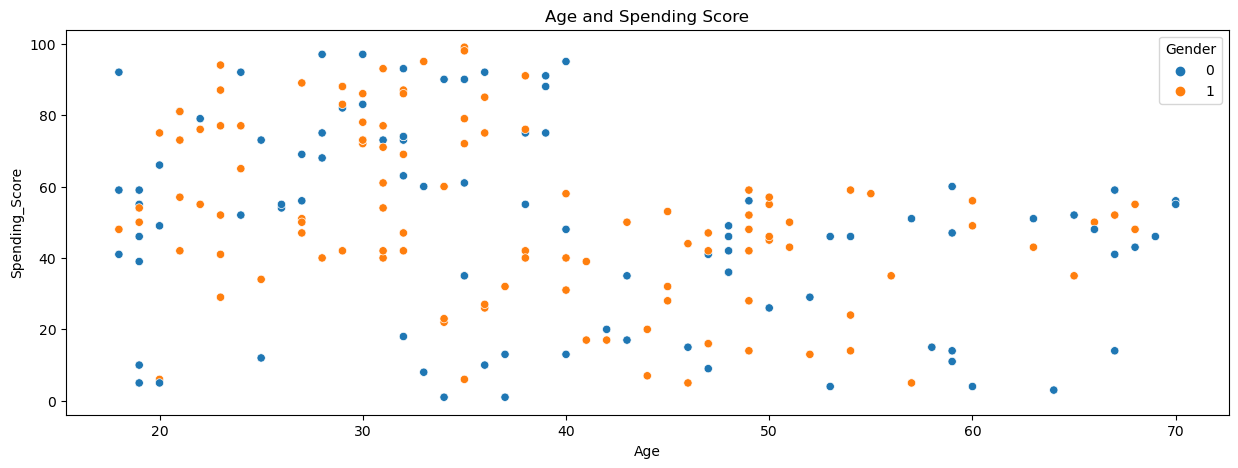

In [21]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x="Age", y="Spending_Score", hue="Gender")
plt.title('Age and Spending Score')
plt.show()

# Cluster Analysis

**The clustering methods can be classified into the following categories:**
- Partitioning Method 
- Hierarchical Method 
- Density-based Method 
- Grid-Based Method 
- Model-Based Method 
- Constraint-based Method
The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)  and [Hierarchical](https://towardsdatascience.com/hierarchical-clustering-explained-e59b13846da8) methods.

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

## Partitioning Method With KMeans

### Clustering based on Age and Spending Score

###  Create a new dataset with two variables of your choice

In [22]:
df

,Gender,Age,Annual_Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [23]:
hopkins(df, df.shape[0]) 

0.3144137271181295

In [24]:
df[["Age",'Spending_Score']]

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [25]:
X = df[["Age",'Spending_Score']]

### Determine Optimal Number of Clusters

In [26]:
hopkins(X, X.shape[0])   # results lower than 0.5 are good for us

0.2889394037288992

In [27]:
from sklearn.cluster import KMeans

In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
ssd = [] # sum of squared distance
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

In [30]:
ssd

[189.38749033992428,
 124.32628617921526,
 89.76521676586152,
 71.29556592219438,
 53.173737453809146,
 46.446285009491625,
 39.30587325192687,
 33.83644725407147]

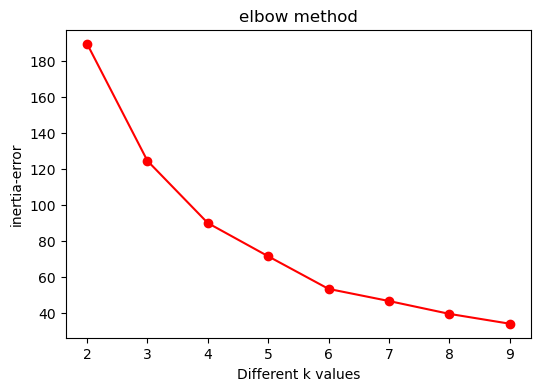

In [31]:
plt.figure(figsize=(6, 4))
plt.plot(K, ssd, "ro-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method");

In [32]:
from yellowbrick.cluster import KElbowVisualizer

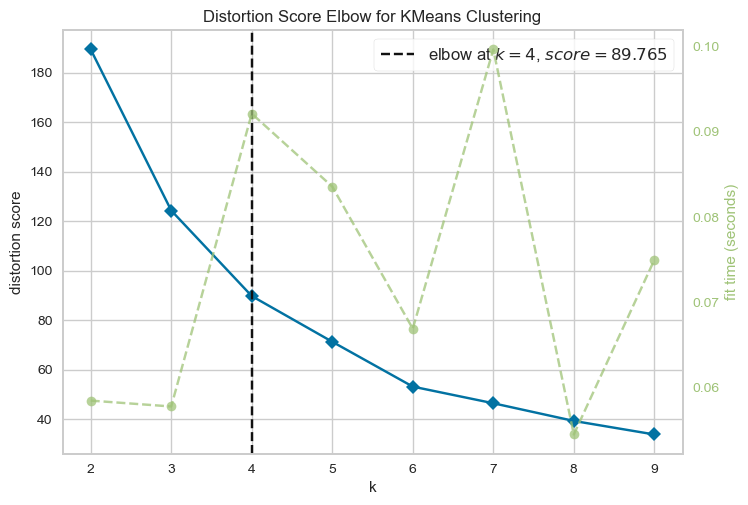

In [33]:
kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X)
visu.show();

#### Silhoutte Analysis

In [34]:
from sklearn.metrics import silhouette_score

In [35]:
silhouette_score(X, kmeans.labels_)

0.4230225675027671

In [36]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4721271643062346
For n_clusters=3, the silhouette score is 0.43952990002101927
For n_clusters=4, the silhouette score is 0.4383860846531993
For n_clusters=5, the silhouette score is 0.42369111306686563
For n_clusters=6, the silhouette score is 0.4566283030197353
For n_clusters=7, the silhouette score is 0.4114882432090666
For n_clusters=8, the silhouette score is 0.41807241036672366


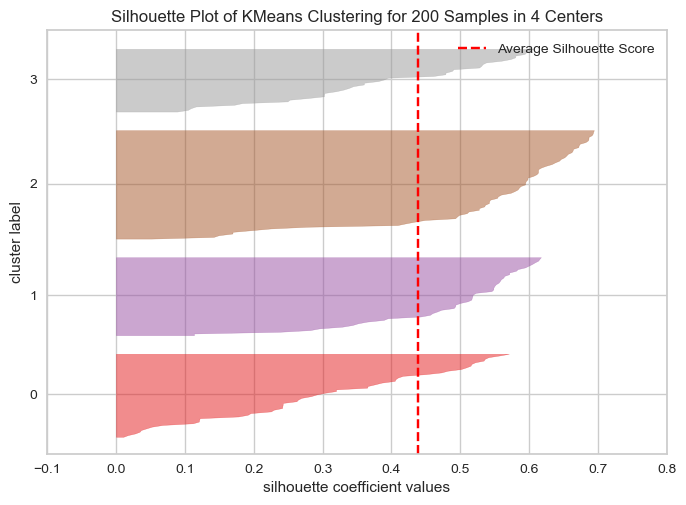

In [37]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

#### Apply K Means With Optimal Clusters

In [38]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(X)

KMeans(n_clusters=4, random_state=42)

In [39]:
model.inertia_

89.76521676586152

In [40]:
model.labels_

array([0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2])

In [41]:
df["clusters1"] = model.labels_

In [42]:
df

,Gender,Age,Annual_Income,Spending_Score,clusters1
0,0,19,15,39,0
1,0,21,15,81,2
2,1,20,16,6,0
3,1,23,16,77,2
4,1,31,17,40,0
...,...,...,...,...,...
195,1,35,120,79,2
196,1,45,126,28,3
197,0,32,126,74,2
198,0,32,137,18,0


#### Visualizing and Labeling All the Clusters

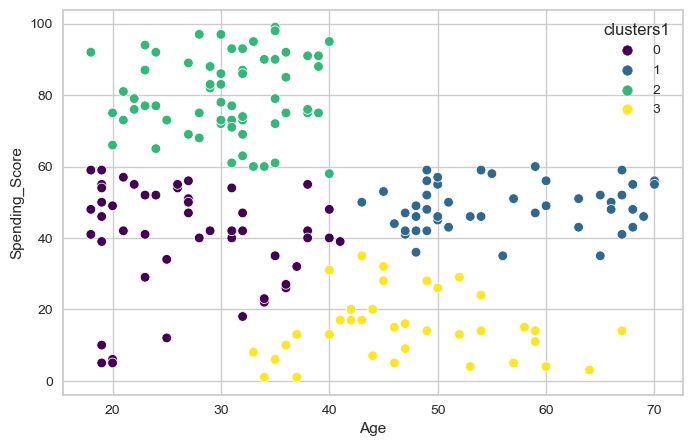

In [43]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Age", y="Spending_Score", hue= "clusters1", palette= "viridis");

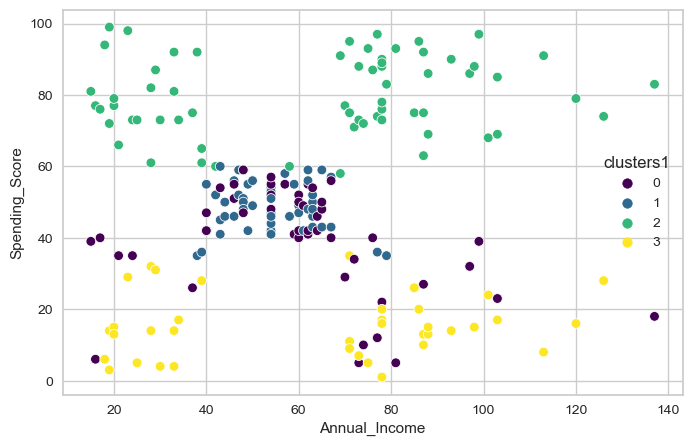

In [44]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Annual_Income", y="Spending_Score", hue= "clusters1", palette= "viridis");

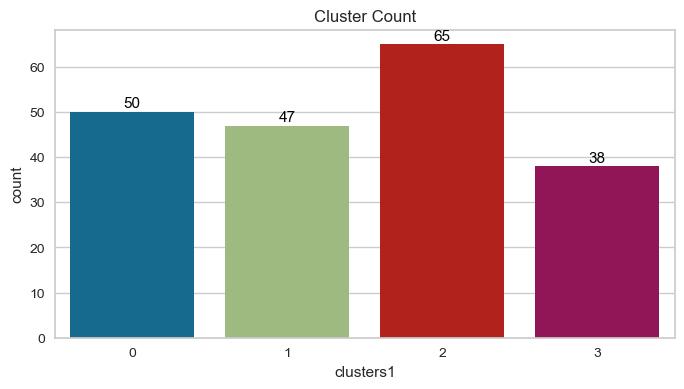

In [45]:
plt.figure(figsize=(8, 4)) 
plt.title("Cluster Count") 
ax = sns.countplot(x=df['clusters1']) 
for p in ax.patches: 
    ax.annotate(f"{p.get_height():1.0f}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 6), 
                textcoords='offset points', clip_on=True) 
plt.show()

### Clustering based on Annual Income and Spending Score

### Create a new dataset with two variables of your choice

In [46]:
X1 = df[["Annual_Income",'Spending_Score']]

In [47]:
X1

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### Determine optimal number of clusters

In [48]:
hopkins(X1, X1.shape[0])   #0.5 den düşük olan değerler bizim için iyi

0.30595821156734054

In [49]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

In [50]:
ssd = [] # sum of squared distance
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X1)
    ssd.append(model.inertia_)

In [51]:
ssd

[270.70426664306717,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.057348270386,
 44.91118554999014,
 37.7364034625416,
 32.37525368158286]

Text(0.5, 1.0, 'elbow method')

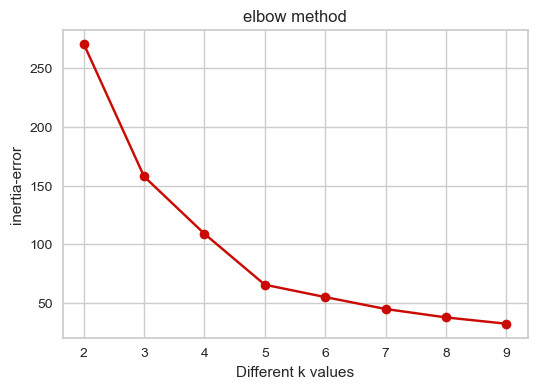

In [52]:
plt.figure(figsize=(6,4))
plt.plot(K, ssd, "ro-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

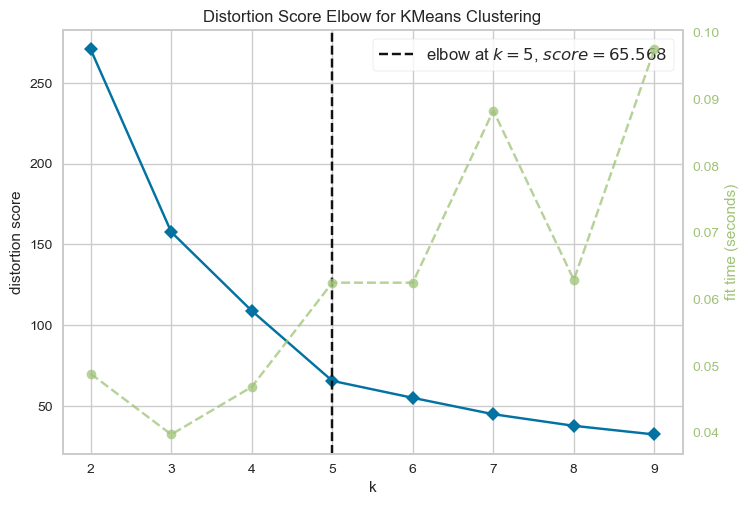

In [53]:
kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X1)
visu.show();

### Silhoutte Analysis

In [54]:
silhouette_score(X1, kmeans.labels_)

0.45532159949822093

In [55]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3146990432802128
For n_clusters=3, the silhouette score is 0.46658474419000145
For n_clusters=4, the silhouette score is 0.4939069237513199
For n_clusters=5, the silhouette score is 0.5546571631111091
For n_clusters=6, the silhouette score is 0.5398800926790663
For n_clusters=7, the silhouette score is 0.5263454490712252
For n_clusters=8, the silhouette score is 0.4558438123118706


### Apply KMeans with optimal clusters

In [56]:
model1 = KMeans(n_clusters=5, random_state=101)
model1.fit(X1)

KMeans(n_clusters=5, random_state=101)

In [57]:
model1.inertia_

65.56840815571681

In [58]:
model1.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [59]:
df["clusters2"] = model1.labels_

In [60]:
df

,Gender,Age,Annual_Income,Spending_Score,clusters1,clusters2
0,0,19,15,39,0,4
1,0,21,15,81,2,3
2,1,20,16,6,0,4
3,1,23,16,77,2,3
4,1,31,17,40,0,4
...,...,...,...,...,...,...
195,1,35,120,79,2,1
196,1,45,126,28,3,2
197,0,32,126,74,2,1
198,0,32,137,18,0,2


### Visualizing and Labeling All the Clusters

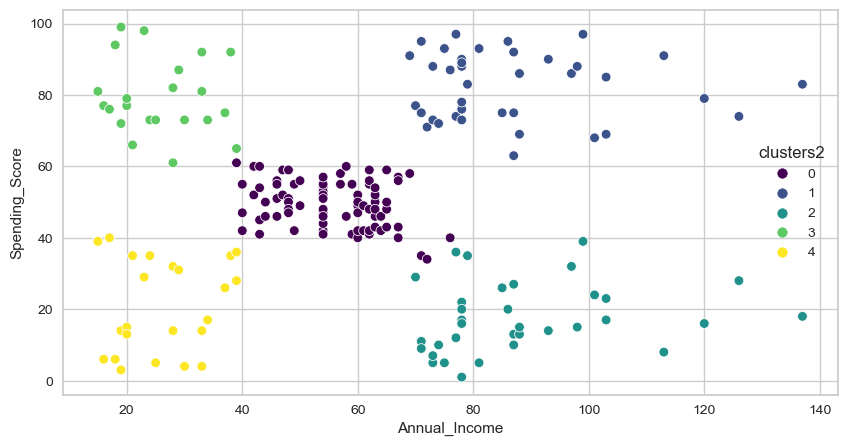

In [61]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="Annual_Income", y="Spending_Score", hue= df["clusters2"], palette= "viridis");

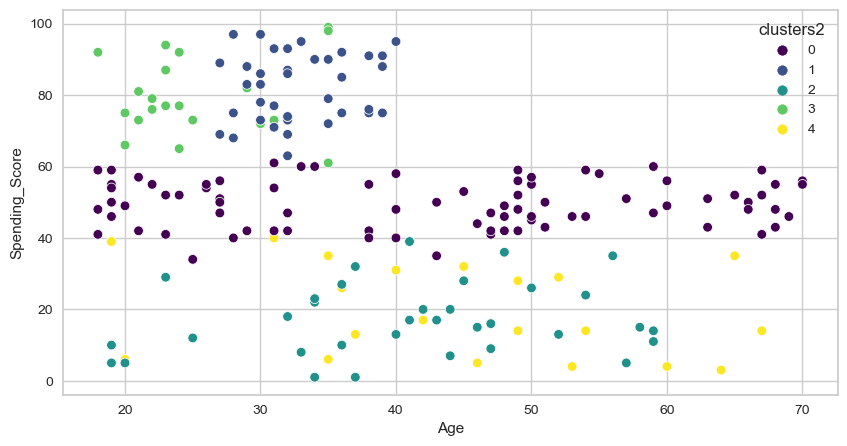

In [62]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="Age", y="Spending_Score", hue= df["clusters2"], palette= "viridis");

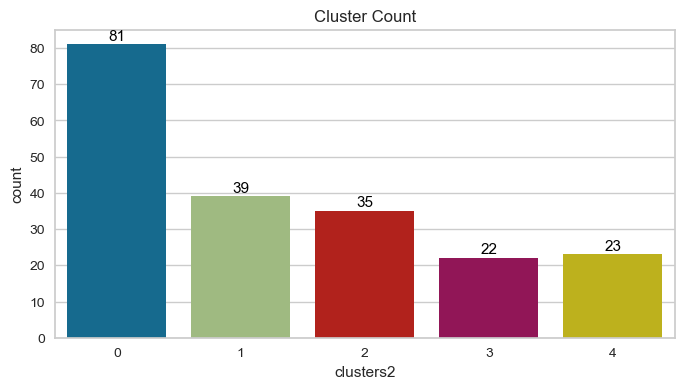

In [63]:
plt.figure(figsize=(8, 4)) 
plt.title("Cluster Count") 
ax = sns.countplot(x=df['clusters2']) 
for p in ax.patches: 
    ax.annotate(f"{p.get_height():1.0f}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 6), 
                textcoords='offset points', clip_on=True) 
plt.show()

## Hierarchical Clustering

### Determine optimal number of clusters using Dendogram

### Clustering based on Age and Spending Score

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [65]:
from sklearn.cluster import AgglomerativeClustering

In [66]:
X2 = df[["Age",'Spending_Score']]

In [67]:
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

In [68]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

### Dendogram

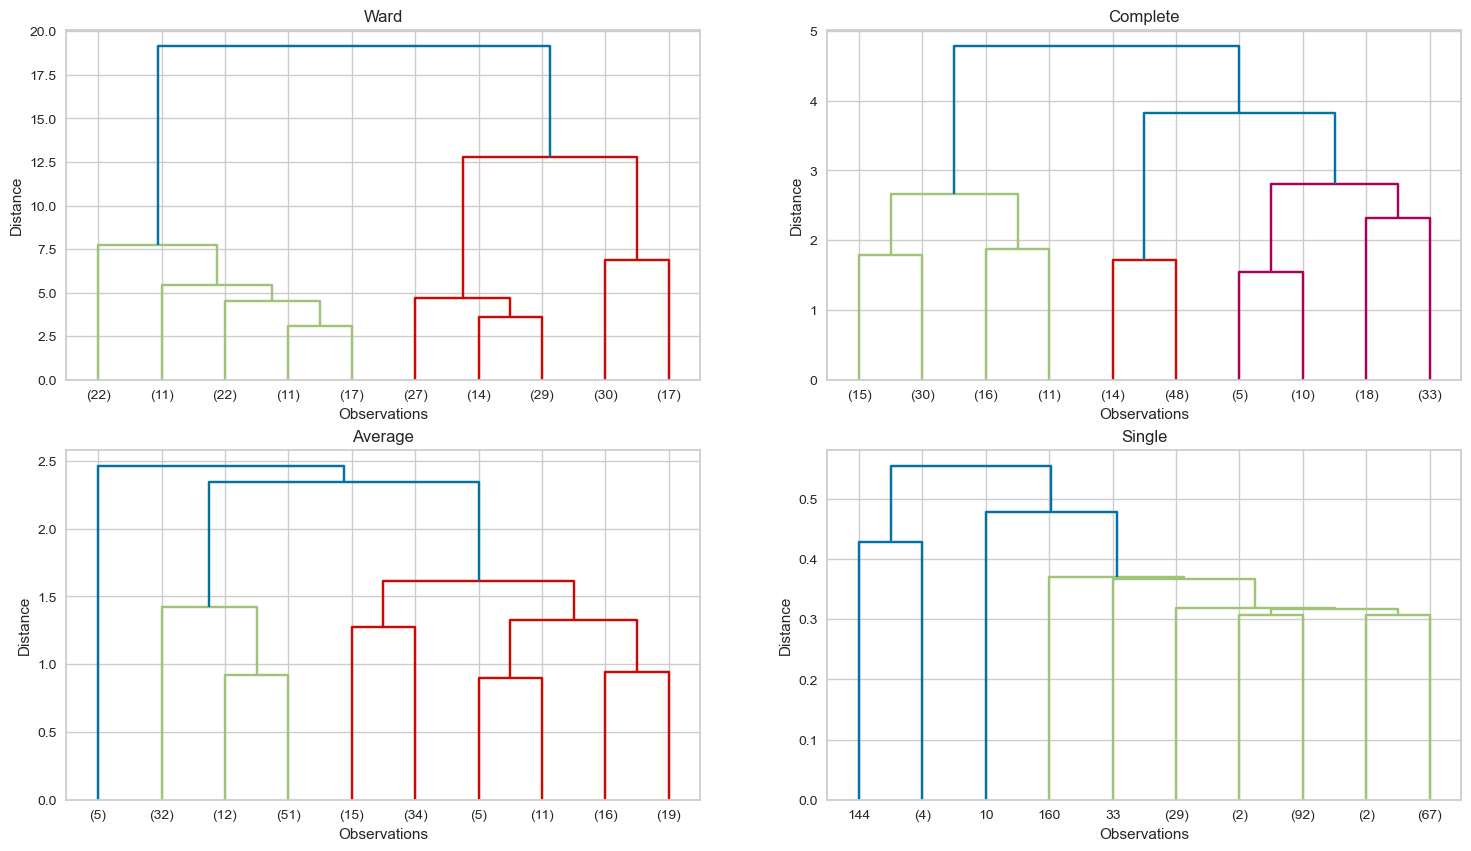

In [69]:
plt.figure(figsize = (18,10))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

### Model Building and label visualisation

In [70]:
K = range(2,10)

for k in K:
    model_w = AgglomerativeClustering(n_clusters = k)
    model_w.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model_w.labels_)}')

Silhouette Score for 2 clusters: 0.41449964268735984
Silhouette Score for 3 clusters: 0.41664148520394606
Silhouette Score for 4 clusters: 0.3892700489345869
Silhouette Score for 5 clusters: 0.3764554127950157
Silhouette Score for 6 clusters: 0.3990690566534328
Silhouette Score for 7 clusters: 0.3586046783668453
Silhouette Score for 8 clusters: 0.3610812833213386
Silhouette Score for 9 clusters: 0.365908374973662


In [71]:
model_w1 = AgglomerativeClustering(n_clusters=3, metric = "euclidean", linkage = "ward")
model_w1.fit_predict(X2)
# If linkage is “ward”, only “euclidean” is accepted.

array([1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1,
       2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2], dtype=int64)

In [72]:
df["cluster_w1"] = model_w1.labels_

In [73]:
df

,Gender,Age,Annual_Income,Spending_Score,clusters1,clusters2,cluster_w1
0,0,19,15,39,0,4,1
1,0,21,15,81,2,3,2
2,1,20,16,6,0,4,1
3,1,23,16,77,2,3,2
4,1,31,17,40,0,4,1
...,...,...,...,...,...,...,...
195,1,35,120,79,2,1,2
196,1,45,126,28,3,2,0
197,0,32,126,74,2,1,2
198,0,32,137,18,0,2,1


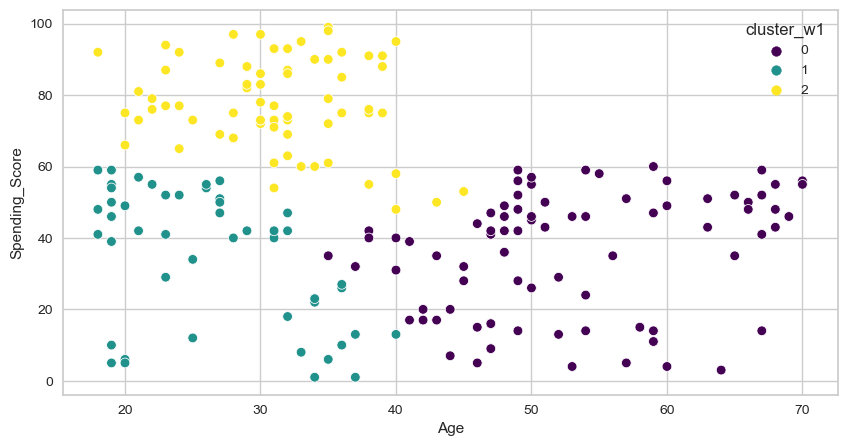

In [74]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="Age", y="Spending_Score", hue="cluster_w1", palette= "viridis");

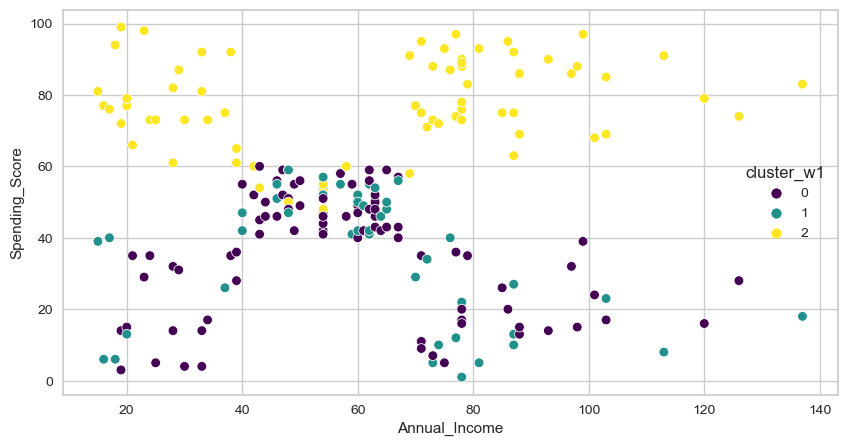

In [75]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="Annual_Income", y="Spending_Score", hue= "cluster_w1", palette= "viridis");

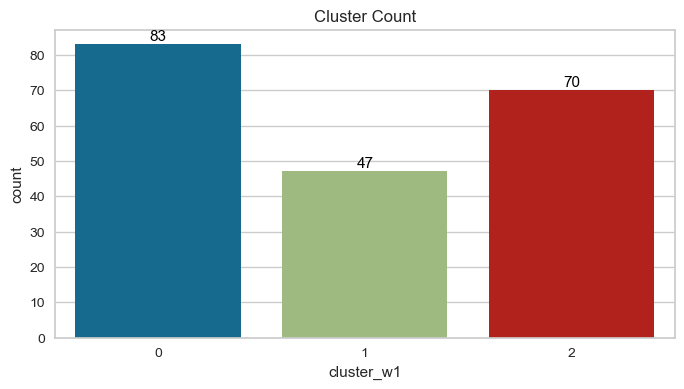

In [76]:
plt.figure(figsize=(8, 4))
plt.title("Cluster Count")
ax = sns.countplot(x = df['cluster_w1'])

for p in ax.patches: 
    ax.annotate(f"{p.get_height():1.0f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='center', 
                fontsize=11, 
                color='black', 
                xytext=(0, 6), 
                textcoords='offset points', 
                clip_on=True) 
plt.show()

### Clustering based on Annual Income and Spending Score

In [77]:
X3 = df[["Annual_Income",'Spending_Score']]

In [78]:
scaler = StandardScaler()
X3 = scaler.fit_transform(X3)

In [79]:
hc_ward = linkage(y = X3, method = "ward")
hc_complete = linkage(X3, "complete")
hc_average = linkage(X3, "average")
hc_single = linkage(X3, "single")

### Dendogram

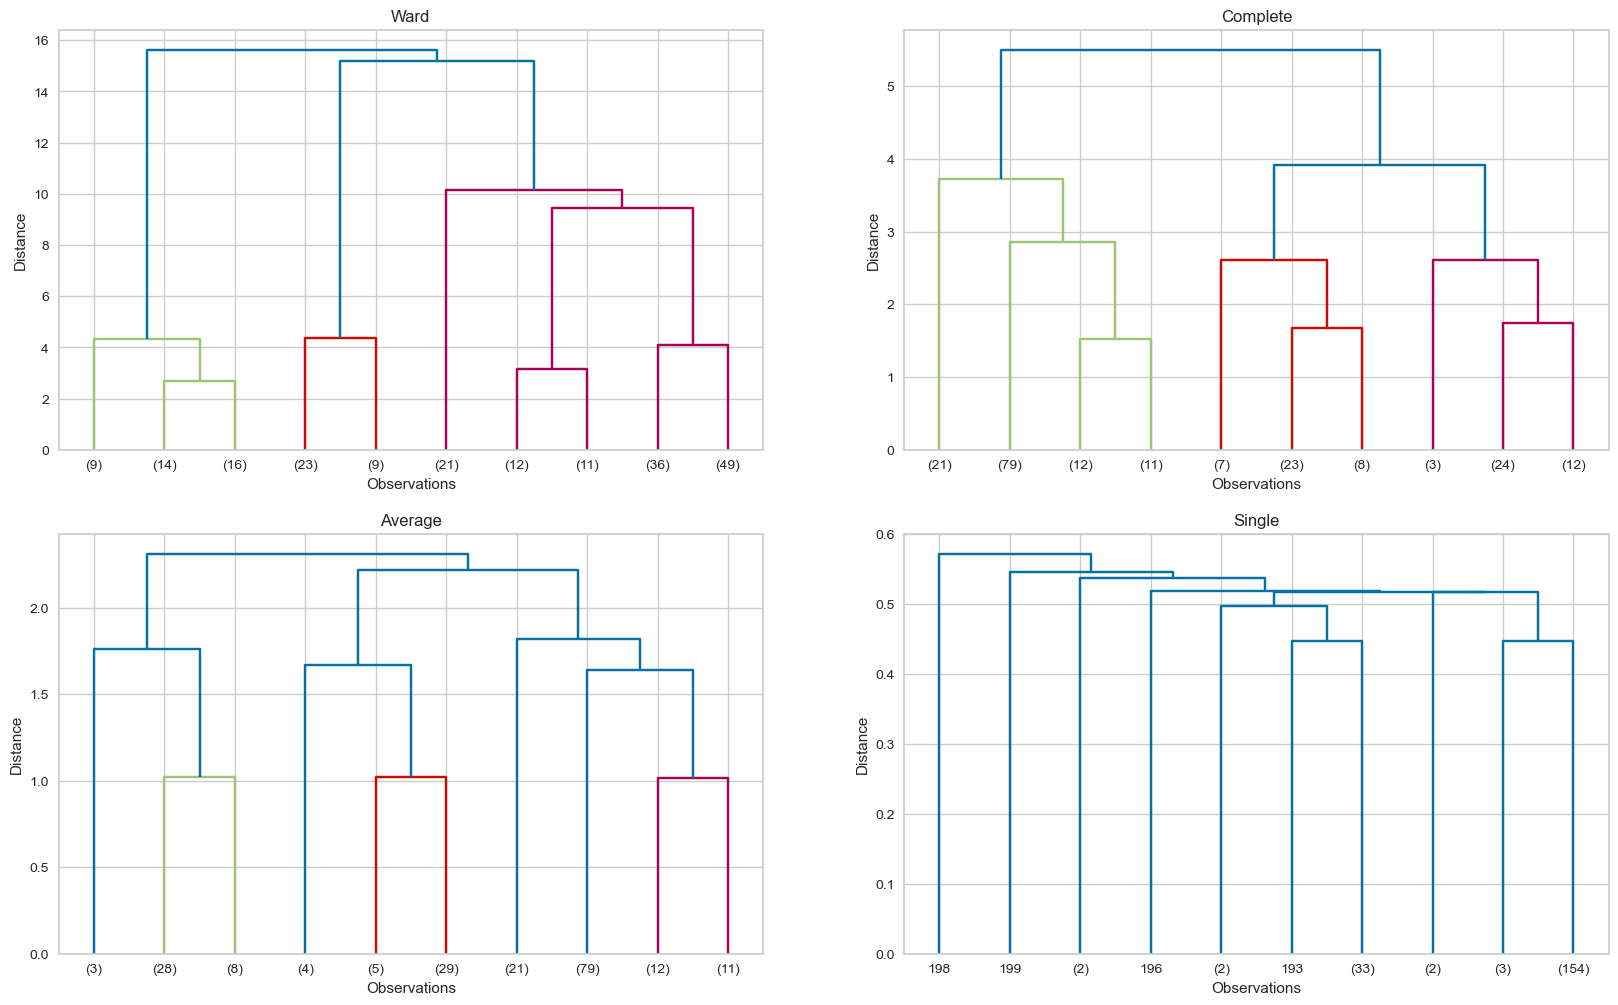

In [80]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [81]:
K = range(2,10)

for k in K:
    model_w = AgglomerativeClustering(n_clusters = k)
    model_w.fit_predict(X3)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X3, model_w.labels_)}')

Silhouette Score for 2 clusters: 0.3842337621772661
Silhouette Score for 3 clusters: 0.4610481446570447
Silhouette Score for 4 clusters: 0.4925507715349343
Silhouette Score for 5 clusters: 0.5538089226688662
Silhouette Score for 6 clusters: 0.5386761871036926
Silhouette Score for 7 clusters: 0.5197949293475768
Silhouette Score for 8 clusters: 0.4308617778221774
Silhouette Score for 9 clusters: 0.43768997758154127


In [82]:
model_w2 = AgglomerativeClustering(n_clusters=5,affinity = "euclidean", linkage = "ward")
model_w2.fit_predict(X3)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

### Visualizing and Labeling All the Clusters

#### Age and Spending Score

In [83]:
model_w2.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [84]:
df["cluster_w2"] = model_w2.labels_

In [85]:
df

,Gender,Age,Annual_Income,Spending_Score,clusters1,clusters2,cluster_w1,cluster_w2
0,0,19,15,39,0,4,1,4
1,0,21,15,81,2,3,2,3
2,1,20,16,6,0,4,1,4
3,1,23,16,77,2,3,2,3
4,1,31,17,40,0,4,1,4
...,...,...,...,...,...,...,...,...
195,1,35,120,79,2,1,2,1
196,1,45,126,28,3,2,0,0
197,0,32,126,74,2,1,2,1
198,0,32,137,18,0,2,1,0


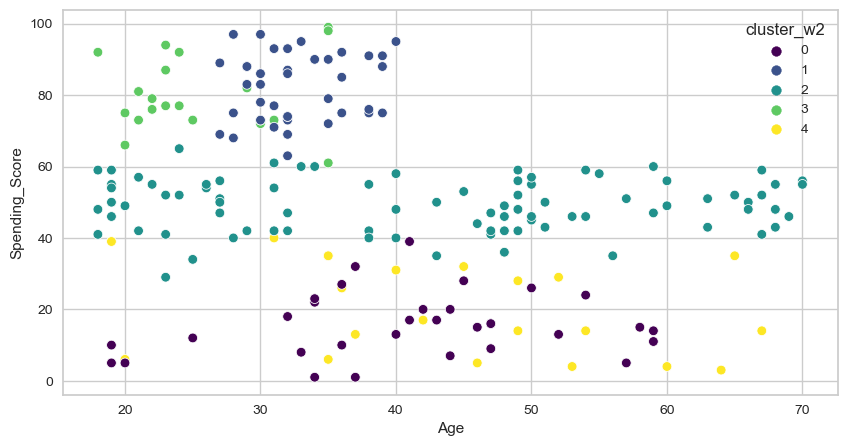

In [86]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="Age", y="Spending_Score", hue= "cluster_w2", palette= "viridis");

#### Annual Income and Spending Score

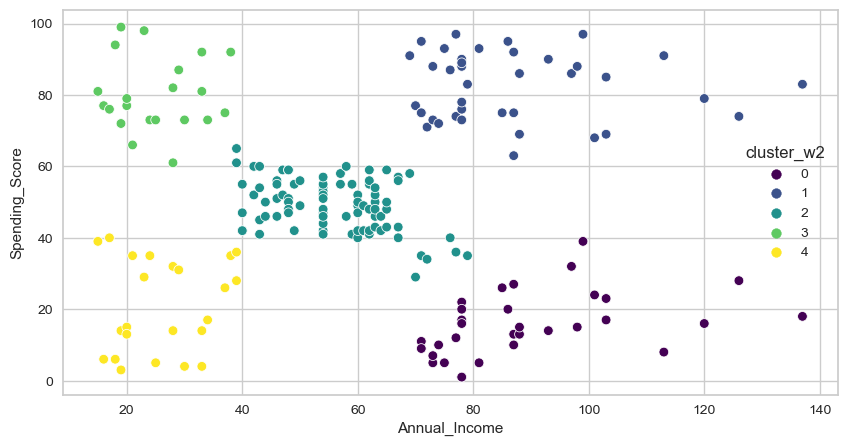

In [87]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="Annual_Income", y="Spending_Score", hue= "cluster_w2", palette= "viridis");

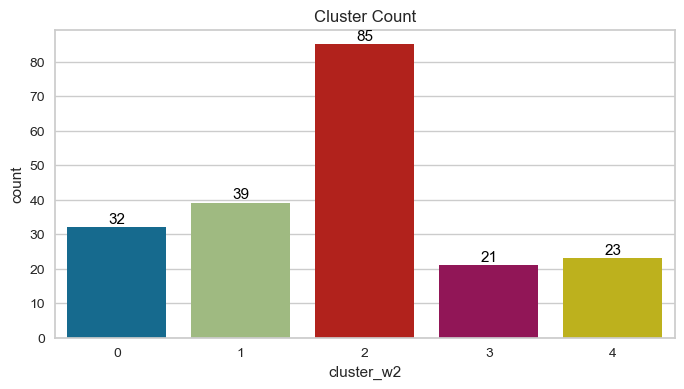

In [88]:
plt.figure(figsize=(8, 4))
plt.title("Cluster Count")
ax = sns.countplot(x = df['cluster_w2'])

for p in ax.patches: 
    ax.annotate(f"{p.get_height():1.0f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='center', 
                fontsize=11, 
                color='black', 
                xytext=(0, 6), 
                textcoords='offset points', 
                clip_on=True) 
plt.show()

# Conclusion

## Interpretation based on Age and Spending Score- X 

**cluster 0 :** The younger demographic ( average age 30), with low and above the average annual income and spending score  almost on average. 
- Free-courses or workshops that enhance job-related skills or offer training in new fields could help increase their income potential.
- Use data segmentation to tailor offers. High-income individuals might appreciate luxury and exclusive items, while those with lower incomes could benefit from value-driven deals.

**cluster 1:** The older demographic (average age 60), with spending score on average and annual income just below the average. 
- Implementing a reward program where consistent spending earns them points or discounts on future purchases may make them spend more. 
- It's important  to seek their feedback regularly to understand their needs better and show that their opinions matter.

**cluster 2 :** The younger demographic ( average age 30), with high spending score and annual income. This group consists of loyal customers. 
- Introducing exclusive promotions and limited-time offers that create a sense of urgency and excitement. 
- This age group is highly engaged online and influenced by peers and trends so leveraging social media and influencer collaborations would ge a good strategy.

**cluster 3:** The middle/older demographic (average age 50), with varied income levels, predominantly low and middle  but definitely low spending_score. 
- Provide exceptional customer service. Quick, empathetic, and effective support can make a significant difference in building loyalty.
- Offer loyalty programs that provide exclusive discounts, early access to new products, or special events.

## Interpretation based on Annual Income and Spending Score- X1


**cluster 0 :** A diverse age group, with spending score nearly on average and annual income averaging just below 60 k. 
- Free-courses or workshops  that enhance job-related skills or offer training in new fields could help increase their income potential especially for younger ones.
- Tailor your marketing messages to different age groups within this segment, ensuring relevancy and personal connection.

**cluster 1 :** The younger demographic ( average age 35), with high spending score and annual income. This group consists of loyal customers. 
- Introducing exclusive promotions and limited-time offers that create a sense of urgency and excitement. 
- This age group is highly engaged online and influenced by peers and trends so leveraging social media and influencer collaborations would ge a good strategy.

**cluster 2:** Age group between 20-60, with low spending score and high annual income. 
- Develop a loyalty program that offers significant rewards for repeat purchases. Tiered rewards can make them feel valued and appreciated. 
- Craft personalized, high-value offers that resonate with their higher income. Limited-time promotions for premium products can create a sense of urgency.

**cluster 3 :** The younger demographic ( average age 30), with low annual income  and high spending score. 
- Free-courses or workshops that enhance job-related skills or offer training in new fields could help increase their income potential.
- Use data segmentation to tailor offers. Low-income individuals might benefit from value-driven deals.

**cluster 4:** A diverse age group, with low annual income and low low spending_score. 
- - Free-courses or workshops  that enhance job-related skills or offer training in new fields could help increase their income potential especially for younger ones.
- Offer resources on budgeting, financial planning, and tips for getting the most out of their purchases. Position your brand as a helpful ally.

### Interpretation based on Age and Spending Score- X2

**cluster 0** : An older demographic (average age 55) with varied income levels, predominantly below average, and spending scores showing a spread and variation within the below-average range. 
It should be researched what can be done to direct more spending.
- Focus on products that enhance health and well-being, such as fitness equipment, dietary supplements, and ergonomic home items for high annual income.
- Provide installment plans or “buy now, pay later” options to make essential purchases manageable for low annual income.

**cluster 1**: A younger demographic (average age 30) with varied, mostly below-average income levels, and spending scores that range widely within the below-average.
- Free-courses or workshops that enhance job-related skills or offer training in new fields could help increase income potential of those with low income.
- Utilize data to provide personalized product suggestions that align with their preferences and budgets.    

**cluster 2** :A younger demographic (average age 30) with varied income levels, predominantly above average, and high spending scores. This group consists of loyal customers.
- Free-courses or workshops that enhance job-related skills or offer training in new fields could help increase income potential of those with low income.
- Highlight premium products and exclusive deals of those with high income.


### Interpretation based on Age and Spending Score- X3

**cluster 0:** The group of individuals up to the age of 60, with low spending score and high annual income. 
- Develop a loyalty program that offers significant rewards for repeat purchases. Tiered rewards can make them feel valued and appreciated. 
- Craft personalized, high-value offers that resonate with their higher income. Limited-time promotions for premium products can create a sense of urgency.

**cluster 1 :** A younger demographic (average age almost 35), with high spending score and annual income. This group consists of loyal customers. 
- Introducing exclusive promotions and limited-time offers that create a sense of urgency and excitement. 
- This age group is highly engaged online and influenced by peers and trends so leveraging social media and influencer collaborations would ge a good strategy.

**cluster 2 :** A diverse age group, with spending score nearly on average and annual income averaging just below 60 k. 
- Free-courses or workshops  that enhance job-related skills or offer training in new fields could help increase their income potential especially for younger ones.
- Utilize data to provide tailored suggestions that align with their preferences, making them feel understood and valued.

**cluster 3 :** The younger demographic ( below age 30), with low annual income  and high spending score. 
- Free-courses or workshops that enhance job-related skills or offer training in new fields could help increase their income potential.
- Use data segmentation to tailor offers. Low-income individuals might benefit from value-driven deals.

**cluster 4:** A diverse age group predominantly middle age, with low annual income and low low spending_score. 
- - Free-courses or workshops  that enhance job-related skills or offer training in new fields could help increase their income potential especially for younger ones.
- Offer resources on budgeting, financial planning, and tips for getting the most out of their purchases. Position your brand as a helpful ally.